In [1]:
import json
from collections import Counter

# Define the function to count answer types
def count_answer_types(filepath):
    with open(filepath, 'r') as f:
        data = json.load(f)

    # Count each answer type
    answer_types = [item['answer_type'] for item in data if 'answer_type' in item]
    return Counter(answer_types), len(data)

# Paths to the VizWiz annotation files
files = {
    'train': '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset/annotations/train.json',
    'val': '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset/annotations/val.json',
    'test': '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset/annotations/test.json',
}

# Aggregate and display counts
for split, path in files.items():
    counts, total = count_answer_types(path)
    print(f"{split.capitalize()} set counts (Total: {total}):")
    for k in ['yes/no', 'number', 'other', 'unanswerable']:
        print(f"  {k}: {counts.get(k, 0)}")
    print()

Train set counts (Total: 1998):
  yes/no: 96
  number: 33
  other: 1177
  unanswerable: 692

Val set counts (Total: 283):
  yes/no: 13
  number: 4
  other: 168
  unanswerable: 98

Test set counts (Total: 569):
  yes/no: 27
  number: 9
  other: 336
  unanswerable: 197




🧠 Answer type: yes/no (3 samples)


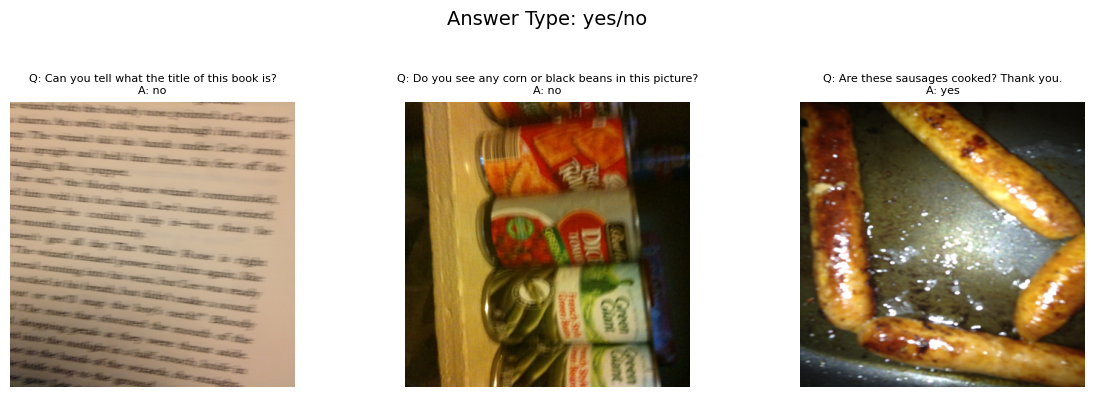


🧠 Answer type: number (3 samples)


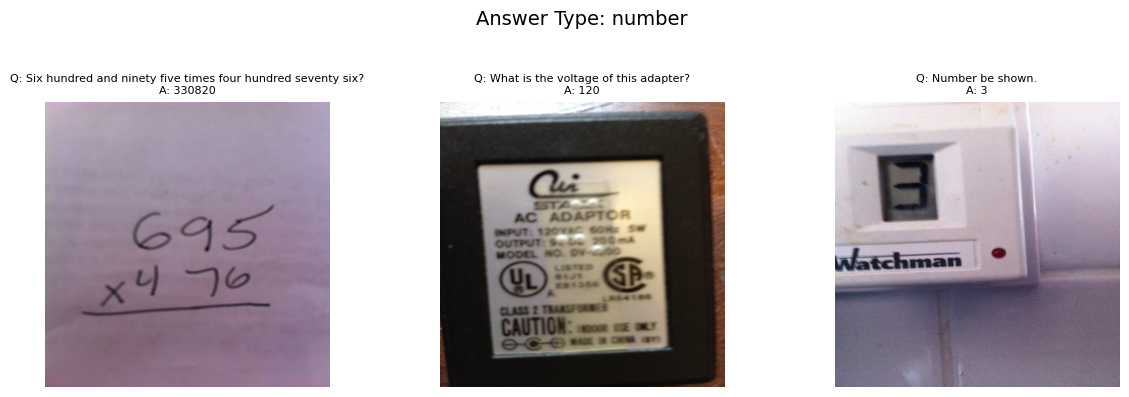


🧠 Answer type: other (3 samples)


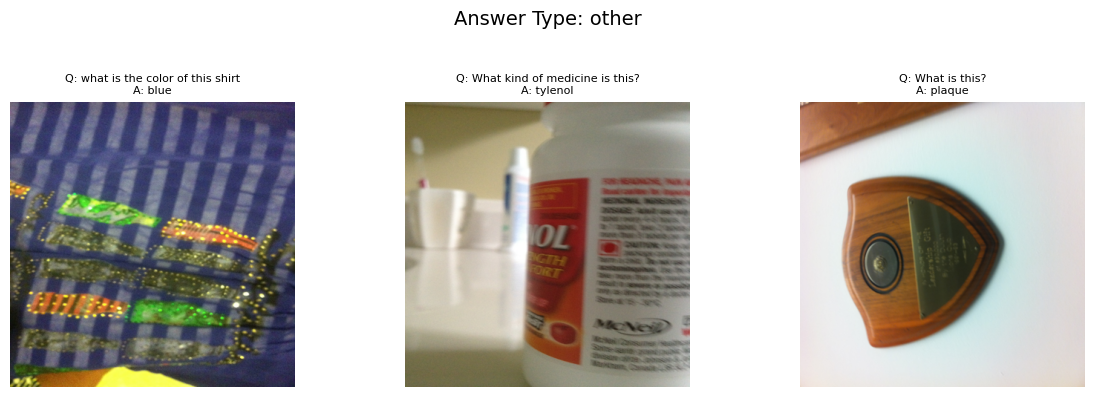


🧠 Answer type: unanswerable (3 samples)


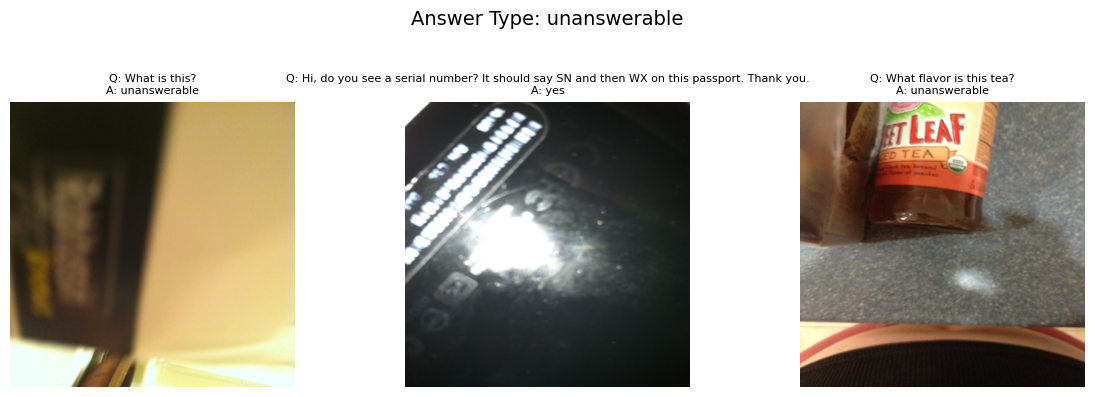

In [3]:
import json
import os
import random
from collections import defaultdict
from PIL import Image
import matplotlib.pyplot as plt

# === Config ===
annotation_path = '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset/annotations/train.json'
image_dir = '/Users/zagaraa/Documents/GitHub/visionaid-vqa/data/balanced_subset/train'
samples_per_class = 3
seed = 42
image_size = (384, 384)  # Fixed image size

# === Load annotations ===
with open(annotation_path, 'r') as f:
    data = json.load(f)

# === Group by answer_type ===
grouped = defaultdict(list)
for item in data:
    atype = item.get('answer_type', 'unknown')
    grouped[atype].append(item)

# === Set seed for reproducibility ===
random.seed(seed)

# === Display ===
for atype, samples in grouped.items():
    chosen = random.sample(samples, min(samples_per_class, len(samples)))
    print(f"\n🧠 Answer type: {atype} ({len(chosen)} samples)")

    fig, axs = plt.subplots(1, samples_per_class, figsize=(samples_per_class * 4, 4))
    fig.suptitle(f"Answer Type: {atype}", fontsize=14)

    for i, sample in enumerate(chosen):
        image_path = os.path.join(image_dir, sample['image'])

        if not os.path.exists(image_path):
            print(f"[Missing] {image_path}")
            continue

        image = Image.open(image_path).convert("RGB").resize(image_size)
        question = sample['question']
        answer = sample['answers'][0]['answer'] if sample['answers'] else 'N/A'

        axs[i].imshow(image)
        axs[i].set_title(f"Q: {question}\nA: {answer}", fontsize=8)
        axs[i].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.75)  # adjust for suptitle
    plt.show()